In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./scegot")

In [3]:
import anndata
from scegot import scEGOT

# DATASET_INPUT_ROOT_PATH = os.path.join(os.getcwd(), "dataset/")
RANDOM_STATE = 2023
GMM_RANDOM_STATE = 3
PCA_N_COMPONENTS = 200
GMM_CLUSTER_NUMBERS = [1, 2, 4, 5, 5]
# UMAP_N_NEIGHBORS = 1000
DAY_NAMES = ["day0", "day0.5", "day1", "day1.5", "day2"]

# input_data = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/Wang/dataset/WT_and_other_conditions/WT.h5ad")
# input_adata = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/Wang/dataset/NKX12KO/NKX12.h5ad")
input_data = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/scEGOT/scegot/dataset/GSE241287_scRNAseq_hPGCLC_induction.h5ad")

scegot = scEGOT(
    input_data,
    verbose=True,  # default=True
    adata_day_key="cluster_day",
)

X, pca_model = scegot.preprocess(
    PCA_N_COMPONENTS,
    recode_params={},
    umi_target_sum=1e5,
    pca_random_state=RANDOM_STATE,
    pca_other_params={},
    apply_recode=True,
    apply_normalization_log1p=True,
    apply_normalization_umi=True,
    select_genes=True,
    n_select_genes=2000,
)

gmm_models, gmm_labels = scegot.fit_predict_gmm(
    n_components_list=GMM_CLUSTER_NUMBERS,
    covariance_type="full",
    max_iter=2000,
    n_init=10,
    random_state=GMM_RANDOM_STATE,
    gmm_other_params={},
)

Processing AnnData...
Applying RECODE...
start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 15820, '#non-significant genes': 2582, '#silent genes': 65, 'ell': 288, 'Elapsed time': '0h 0m 29s 409ms', 'solver': 'randomized', '#train_data': 2354}
Applying UMI normalization...
Applying log1p normalization...
Applying PCA...
	sum of explained_variance_ratio = 94.79824522006263
Fitting GMM models with each day's data and predicting labels for them...


100%|██████████| 5/5 [00:27<00:00,  5.45s/it]


In [4]:
cluster_names = scegot.generate_cluster_names_with_day()

In [6]:
G = scegot.make_cell_state_graph(
    cluster_names=cluster_names
)

In [11]:
import matplotlib.pyplot as plt

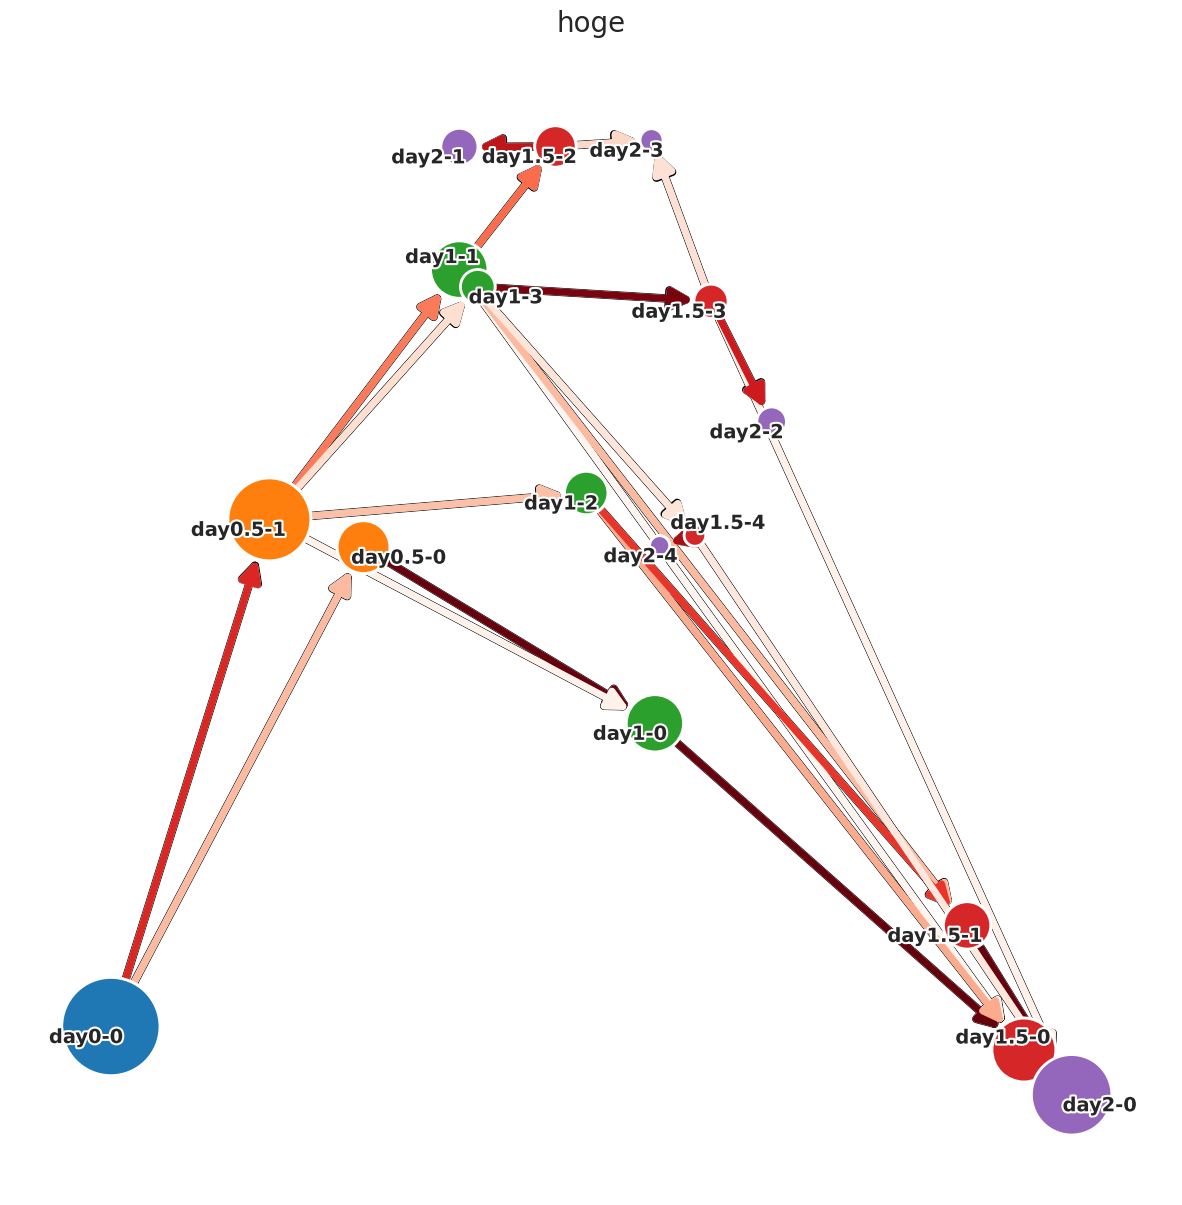

In [12]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
G.draw(ax, title="hoge")